In [61]:
import requests
import pandas as pd
from pyjstat import pyjstat
from collections import OrderedDict
import matplotlib.pyplot as plt

In [83]:
# URL de la API del INEGI
key = '44c77db1-a4bd-c662-9b4c-d22dfbb08213' 
url = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/JSONSTAT/1002000001/es/0700/false/BISE/44c77db1-a4bd-c662-9b4c-d22dfbb08213?type=jsonStat'
#url= 'https://www.inegi.org.mx/servicios/api_indicadores.html#:~:text=La%20API%20de%20Indicadores%20del,momento%20en%20que%20se%20actualiza'
# read from json-stat
dataset = pyjstat.Dataset.read(url)

# write to dataframe
df = dataset.write('dataframe')

In [84]:
print(df.head()) # Muestra las primeras filas del DataFrame

       Indicadores  Frecuencia           Area_geografica       Tema Periodo  \
0  Población total  Quinquenal  Estados Unidos Mexicanos  Población    1910   
1  Población total  Quinquenal  Estados Unidos Mexicanos  Población    1921   
2  Población total  Quinquenal  Estados Unidos Mexicanos  Población    1930   
3  Población total  Quinquenal  Estados Unidos Mexicanos  Población    1940   
4  Población total  Quinquenal  Estados Unidos Mexicanos  Población    1950   

        value  
0  15160369.0  
1  14334780.0  
2  16552722.0  
3  19653552.0  
4  25791017.0  


In [85]:
print(df.info()) # Proporciona información sobre las columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Indicadores      15 non-null     object 
 1   Frecuencia       15 non-null     object 
 2   Area_geografica  15 non-null     object 
 3   Tema             15 non-null     object 
 4   Periodo          15 non-null     object 
 5   value            15 non-null     float64
dtypes: float64(1), object(5)
memory usage: 848.0+ bytes
None


In [86]:
print(df.describe()) # Proporciona estadísticas descriptivas de las columnas numéricas

              value
count  1.500000e+01
mean   6.486209e+07
std    4.194395e+07
min    1.433478e+07
25%    2.272228e+07
50%    6.684683e+07
75%    1.003734e+08
max    1.260140e+08


In [87]:
df_subset = df.iloc[:, [0, 4, -1]] 
print(df_subset.head())

       Indicadores Periodo       value
0  Población total    1910  15160369.0
1  Población total    1921  14334780.0
2  Población total    1930  16552722.0
3  Población total    1940  19653552.0
4  Población total    1950  25791017.0


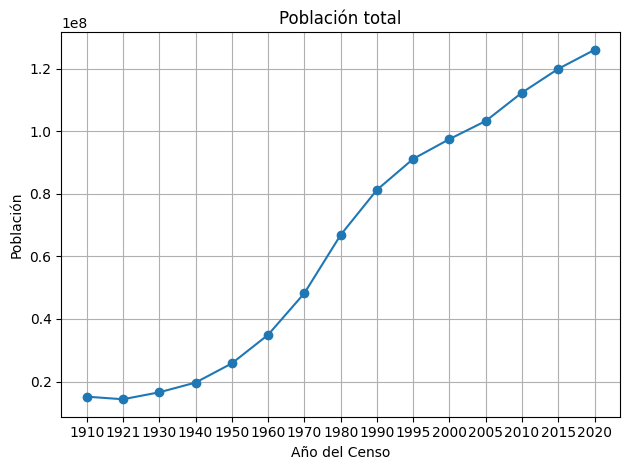

In [88]:
# Graficar el número de habitantes en función del año
plt.plot(df['Periodo'], df['value'], marker='o', linestyle='-')

# Añadir etiquetas y título al gráfico
plt.xlabel('Año del Censo')
plt.ylabel('Población')
plt.title('Población total')

# Mostrar la leyenda si es necesario
# plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
df_subset.to_csv('datos_dashboard.csv', index=False)

In [90]:
import dash
from dash import dcc, html
import pandas as pd

In [98]:
# Cargar datos desde el archivo CSV
df = pd.read_csv('datos_dashboard.csv')

# Iniciar la aplicación Dash
app = dash.Dash(__name__)

# Calcular la variación de población en un rango de años
inicio_rango = 2010
fin_rango = 2020
poblacion_inicio = df.loc[df['Periodo'] == inicio_rango, 'value'].values[0]
poblacion_fin = df.loc[df['Periodo'] == fin_rango, 'value'].values[0]
variacion_poblacion = poblacion_fin - poblacion_inicio

# Diseño del dashboard
app.layout = html.Div([
    html.H1('Dashboard de Población'),
    
    # Gráfico de línea
    dcc.Graph(
        id='poblacion-vs-ano-linea',
        figure={
            'data': [
                {'x': df['Periodo'], 'y': df['value'], 'type': 'line', 'name': 'Población Total'}
            ],
            'layout': {
                'title': 'Población Total en cada Año del Censo (Gráfico de Línea)',
                'xaxis': {'title': 'Año del Censo'},
                'yaxis': {'title': 'Población Total'}
            }
        }
    ),

    # Gráfico de barras
    dcc.Graph(
        id='poblacion-vs-ano-barras',
        figure={
            'data': [
                {'x': df['Periodo'], 'y': df['value'], 'type': 'bar', 'name': 'Población Total'}
            ],
            'layout': {
                'title': 'Población Total en cada Año del Censo (Gráfico de Barras)',
                'xaxis': {'title': 'Año del Censo'},
                'yaxis': {'title': 'Población Total'}
            }
        }
    ),

    # Ejemplo de variación de población
    html.Div([
        html.H2('Variación de Población en el Rango de Años'),
        html.P(f'La población en el año {inicio_rango} fue de {poblacion_inicio}.'),
        html.P(f'La población en el año {fin_rango} fue de {poblacion_fin}.'),
        html.P(f'La variación de población entre {inicio_rango} y {fin_rango} fue de {variacion_poblacion}.')
    ])
])


# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)

In [99]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd

# Cargar datos desde el archivo CSV
df = pd.read_csv('datos_dashboard.csv')

# Iniciar la aplicación Dash
app = dash.Dash(__name__)

# Calcular la variación de población en un rango de años
inicio_rango = 2010
fin_rango = 2020
poblacion_inicio = df.loc[df['Periodo'] == inicio_rango, 'value'].values[0]
poblacion_fin = df.loc[df['Periodo'] == fin_rango, 'value'].values[0]
variacion_poblacion = poblacion_fin - poblacion_inicio

# Diseño del dashboard
app.layout = html.Div([
    html.H1('Dashboard de Población', style={'textAlign': 'center', 'marginBottom': '30px'}),
    
    # Selector de rango de años
    html.Div([
        html.Label('Seleccionar Rango de Años:'),
        dcc.RangeSlider(
            id='rango-anos',
            min=df['Periodo'].min(),
            max=df['Periodo'].max(),
            step=1,
            marks={year: str(year) for year in range(df['Periodo'].min(), df['Periodo'].max() + 1, 5)},
            value=[inicio_rango, fin_rango]
        ),
    ], style={'marginBottom': '30px'}),

    # Gráfico de línea
    dcc.Graph(id='poblacion-vs-ano-linea'),

    # Gráfico de barras
    dcc.Graph(id='poblacion-vs-ano-barras'),

    # Ejemplo de variación de población
    html.Div([
        html.H2('Variación de Población en el Rango de Años'),
        html.P(f'La población en el año {inicio_rango} fue de {poblacion_inicio}.'),
        html.P(f'La población en el año {fin_rango} fue de {poblacion_fin}.'),
        html.P(f'La variación de población entre {inicio_rango} y {fin_rango} fue de {variacion_poblacion}.')
    ], style={'marginTop': '50px'})
], style={'maxWidth': '800px', 'margin': 'auto'})

# Callback para actualizar los gráficos en función del rango de años seleccionado
@app.callback(
    [Output('poblacion-vs-ano-linea', 'figure'),
     Output('poblacion-vs-ano-barras', 'figure')],
    [Input('rango-anos', 'value')]
)
def actualizar_graficos(rango_anos):
    df_filtrado = df[(df['Periodo'] >= rango_anos[0]) & (df['Periodo'] <= rango_anos[1])]
    
    # Gráfico de línea
    fig_linea = {
        'data': [{'x': df_filtrado['Periodo'], 'y': df_filtrado['value'], 'type': 'line', 'name': 'Población Total'}],
        'layout': {'title': 'Población Total en cada Año del Censo (Gráfico de Línea)', 'xaxis': {'title': 'Año del Censo'}, 'yaxis': {'title': 'Población Total'}}
    }

    # Gráfico de barras
    fig_barras = {
        'data': [{'x': df_filtrado['Periodo'], 'y': df_filtrado['value'], 'type': 'bar', 'name': 'Población Total'}],
        'layout': {'title': 'Población Total en cada Año del Censo (Gráfico de Barras)', 'xaxis': {'title': 'Año del Censo'}, 'yaxis': {'title': 'Población Total'}}
    }

    return fig_linea, fig_barras

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

In [7]:
# Cargar el archivo de datos
file_path = '/Users/Abraham/iCloud Drive (Archive)/Documents/ML-Python/E_Commerce_Dataset.xlsx'
data = pd.read_excel(file_path, header=1)
data = data.dropna(axis=1)

Ecomm = pd.read_excel(file_path, sheet_name='E Comm')

Ecomm = Ecomm.dropna()

Ecomm

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,153.81
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,154.66
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [12]:
# Dividir los datos en características (X) y etiquetas (y)
X = Ecomm.drop(columns=['Churn'])
y = Ecomm['Churn']

# Convertir variables categóricas en variables dummy
X = pd.get_dummies(X, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo de regresión logística con más iteraciones
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred = log_reg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Interpretar los resultados
coeficientes = log_reg_model.coef_[0]
features = X.columns
coeficientes_df = pd.DataFrame({'Feature': features, 'Coefficient': coeficientes})
coeficientes_df = coeficientes_df.sort_values(by='Coefficient', ascending=False)
print("Coefficients:")
print(coeficientes_df)

Accuracy: 0.909933774834437
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       648
           1       0.77      0.52      0.62       107

    accuracy                           0.91       755
   macro avg       0.85      0.75      0.79       755
weighted avg       0.90      0.91      0.90       755

Coefficients:
                                  Feature  Coefficient
8                                Complain     0.749307
7                         NumberOfAddress     0.576928
5                NumberOfDeviceRegistered     0.484845
11                             OrderCount     0.484092
29                   MaritalStatus_Single     0.394692
6                       SatisfactionScore     0.355379
3                         WarehouseToHome     0.341162
2                                CityTier     0.256150
20          PreferredPaymentMode_E wallet     0.224102
27                PreferedOrderCat_Others     0.209395
16 

      Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0   6.858098  2.961367        15.973254        2.920505   
1  22.049007  1.476821        14.948344        2.803974   
2   6.596193  1.076818        13.331067        2.511897   
3   7.890855  1.056047        17.143068        3.424041   
4  12.339031  1.707977        15.304843        3.042735   

   NumberOfDeviceRegistered  SatisfactionScore  OrderAmountHikeFromlastYear  \
0                  3.757058           2.992571                    15.346954   
1                  3.617219           2.989404                    15.033113   
2                  2.982325           3.118967                    14.922502   
3                  4.356932           3.064897                    17.146018   
4                  3.826211           3.186610                    15.349003   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0    1.216196    2.130758           3.597325      168.239629  
1    1.421192    2.698013           6.045033

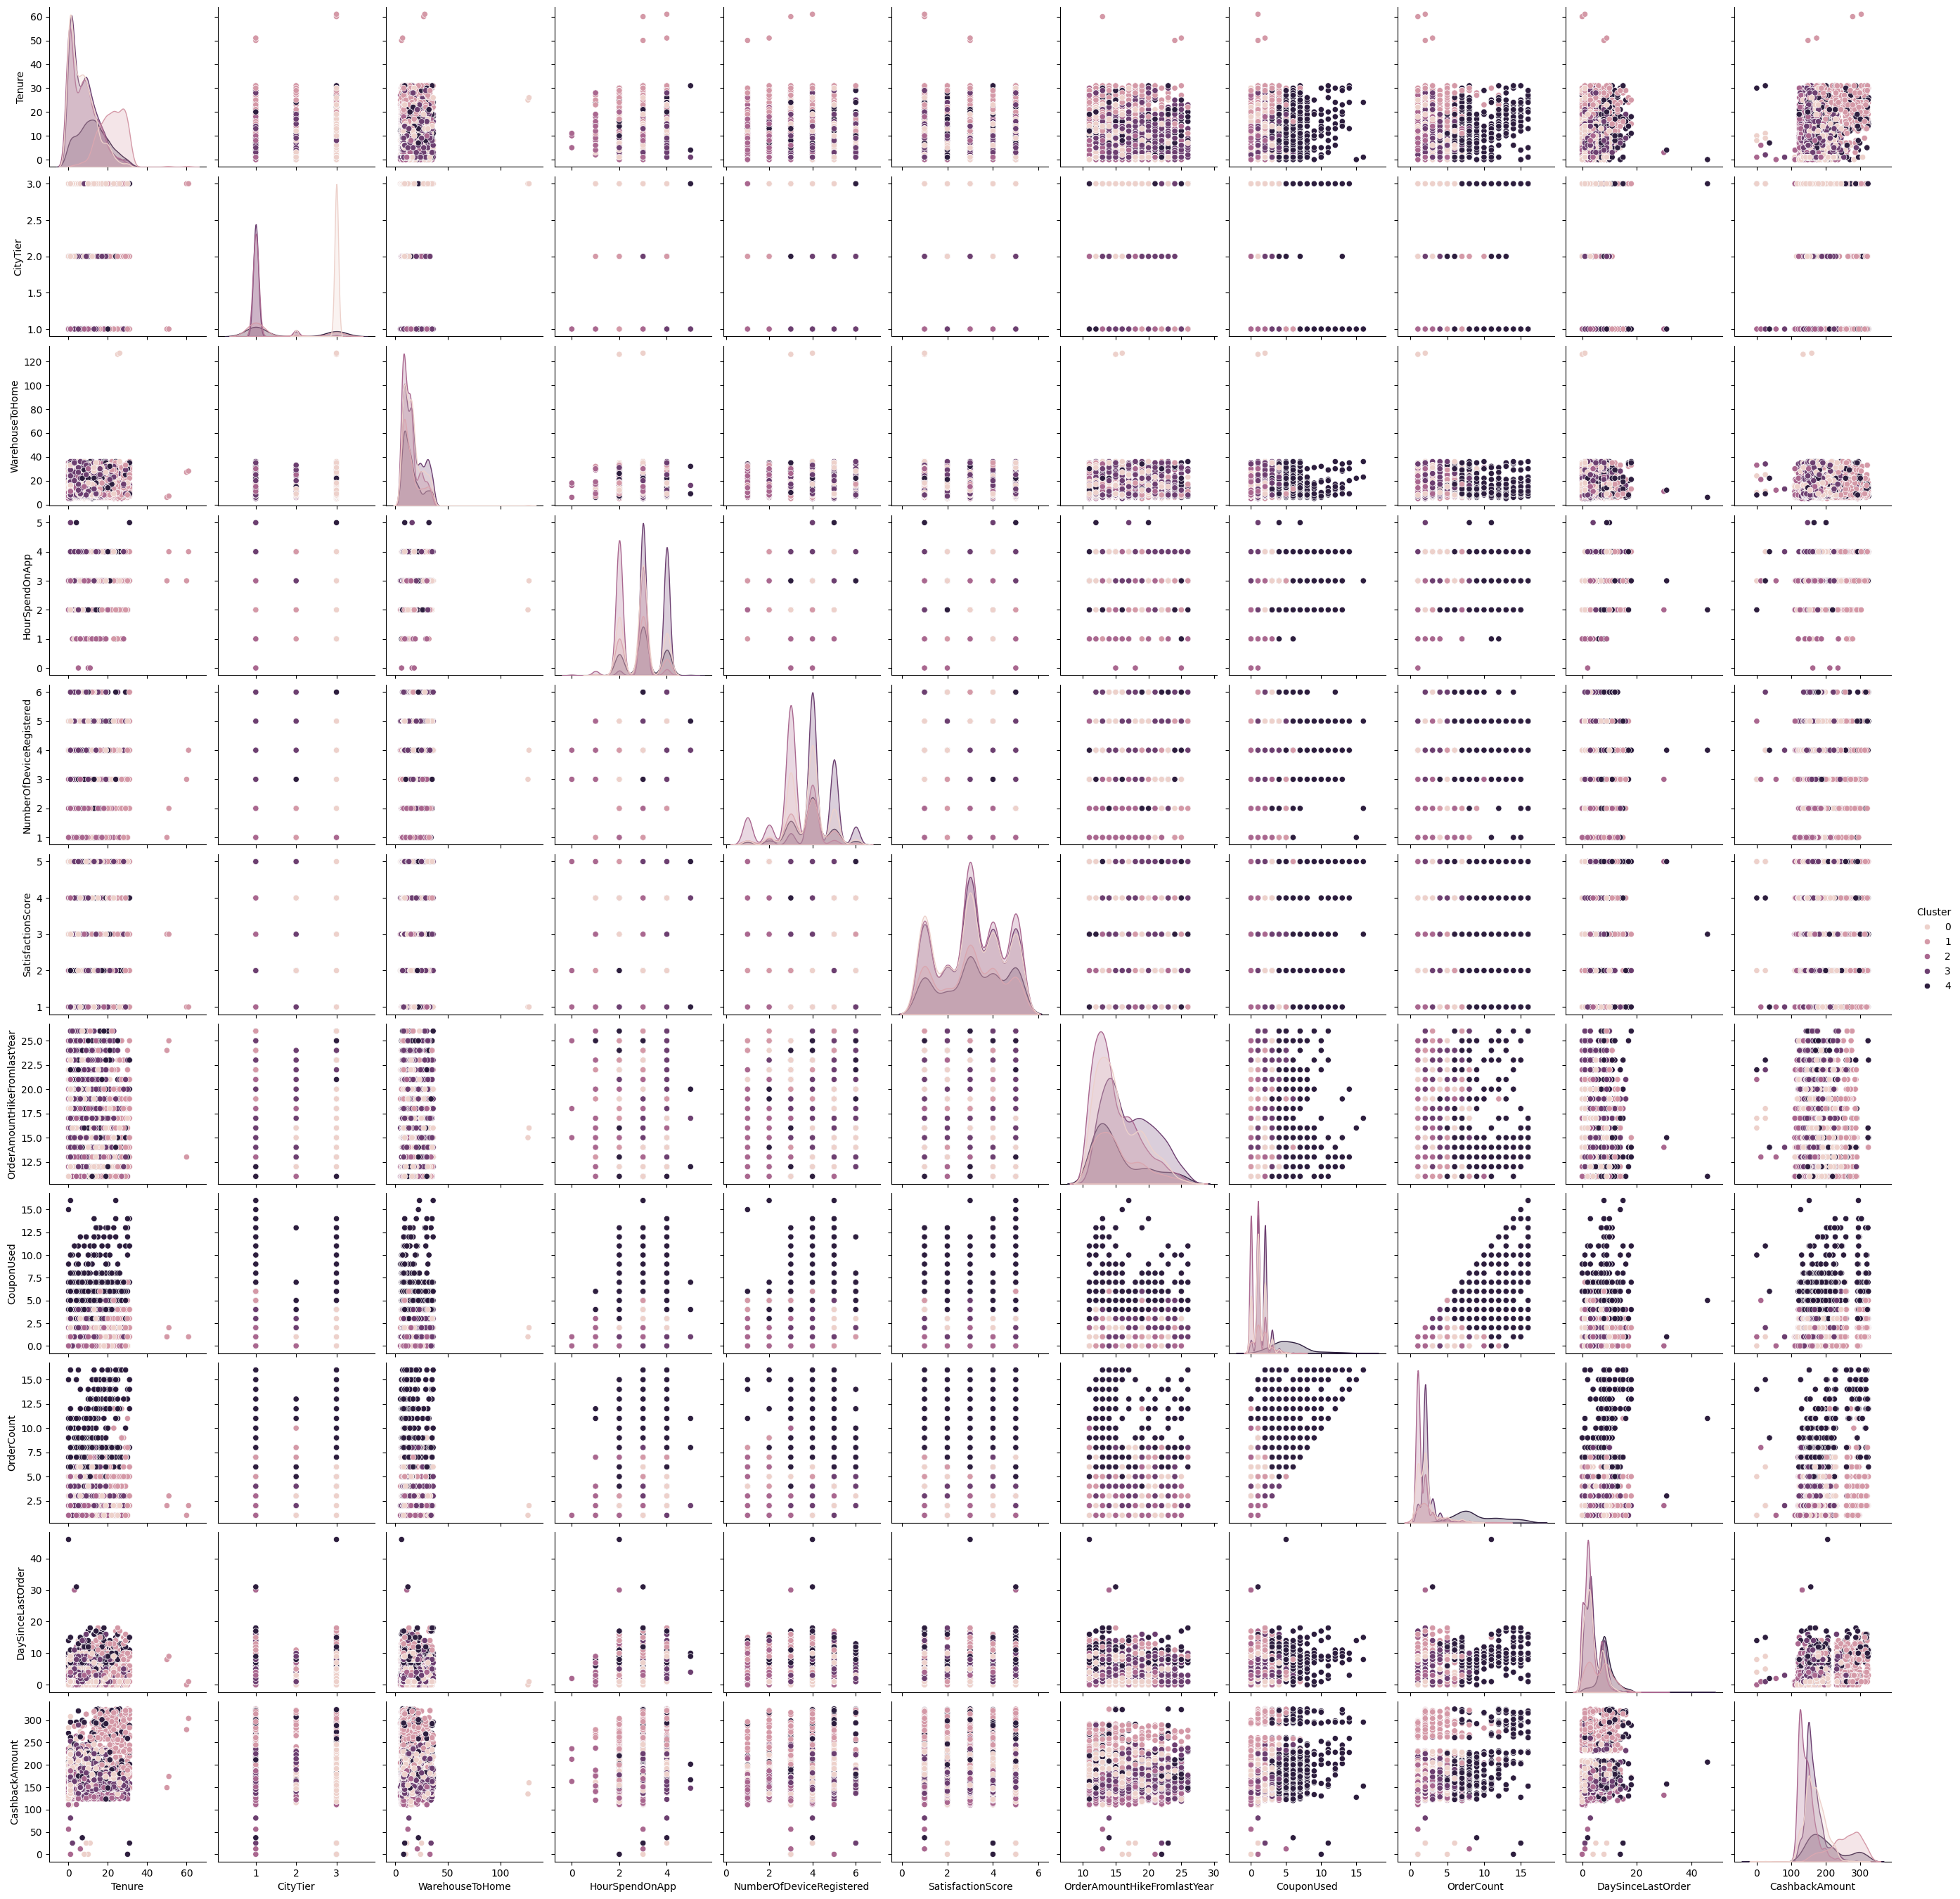

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Cargar el archivo de datos
file_path = '/Users/Abraham/iCloud Drive (Archive)/Documents/ML-Python/E_Commerce_Dataset.xlsx'
Ecomm = pd.read_excel(file_path, sheet_name='E Comm')

# Imputar los valores faltantes
imputer = SimpleImputer(strategy='most_frequent')  
Ecomm_imputed = pd.DataFrame(imputer.fit_transform(Ecomm), columns=Ecomm.columns)

# Aplicar One-Hot Encoding a la columna PreferredLoginDevice
Ecomm_encoded = pd.get_dummies(Ecomm_imputed, columns=['PreferredLoginDevice'])

# Seleccionar las características relevantes para el clustering
selected_features = [
    'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 
    'NumberOfDeviceRegistered', 'SatisfactionScore', 'OrderAmountHikeFromlastYear', 
    'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

# Estandarización de datos
scaler = StandardScaler()
Ecomm_scaled = scaler.fit_transform(Ecomm_encoded[selected_features])

# Aplicación de K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(Ecomm_scaled)

# Añadir los clusters al DataFrame original
Ecomm['Cluster'] = clusters

# Insights de cada cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_features)
print(cluster_centers_df)

# Visualización de clusters
sns.pairplot(Ecomm, hue='Cluster', vars=selected_features)
plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

In [52]:
import pandas as pd
from pandasql import sqldf

# Cargar el archivo de datos
file_path = '/Users/Abraham/iCloud Drive (Archive)/Documents/ML-Python/SQL_TEST.xlsx'
data = pd.read_excel(file_path, header=2)

# Dividir el DataFrame en tres DataFrames diferentes
Customer = data.iloc[0:10, 1:6]
Product = data.iloc[0:23, 8:16]
Station = data.iloc[0:8, 17:20]

# Cambiar los nombres de las columnas en Customer
Customer.columns = ['Customerid', 'Email', 'Name', 'LastName', 'Gender']

# Cambiar los nombres de las columnas en Product
Product.columns = ['ProductID', 'Name', 'Datesale', 'Channel', 'Currency code', 'Amount', 'Customerid', 'Stationid']

# Cambiar los nombres de las columnas en Station
Station.columns = ['Stationid', 'Region', 'City']

In [53]:
# Consulta 1: Clientes con más compras en cada región MX y USA
query1 = """
SELECT c.Name, c.LastName, s.Region
FROM Customer c
JOIN Product p ON c.Customerid = p.Customerid
JOIN Station s ON p.Stationid = s.Stationid
WHERE s.Region IN ('MX', 'USA')
GROUP BY s.Region, c.Name, c.LastName
ORDER BY SUM(p.Amount) DESC
LIMIT 1;
"""

result1 = sqldf(query1, locals())
print("Consulta 1:")
print(result1)
print()

Consulta 1:
       Name        LastName Region
0  ANAPAOLA  MUNOZ ARELLANO     MX



In [56]:
# Consulta 2: Emails de clientes mujeres con valor de productos comprados mayor a $100
query2 = """
SELECT DISTINCT c.Email
FROM Customer c
JOIN Product p ON c.Customerid = p.Customerid
WHERE c.Gender = '1' AND p.Amount > 100;
"""

result2 = sqldf(query2, locals())
print("Consulta 2:")
print(result2)
print()

Consulta 2:
     Email
0   email2
1   email3
2   email5
3   email9
4  email10



In [55]:
# Consulta 3: Número de productos, número de clientes y amount total por región
query3 = """
SELECT s.Region, COUNT(DISTINCT p.ProductID) AS NumProducts, COUNT(DISTINCT c.Customerid) AS NumCustomers, SUM(p.Amount) AS TotalAmount
FROM Product p
JOIN Customer c ON p.Customerid = c.Customerid
JOIN Station s ON p.Stationid = s.Stationid
GROUP BY s.Region;
"""

result3 = sqldf(query3, locals())
print("Consulta 3:")
print(result3)

Consulta 3:
  Region  NumProducts  NumCustomers  TotalAmount
0     MX            7             7         4170
1     US            6             6          252
